#### This method is only good when there is two feature, bcz u know the equation of line, but when its come about higher dimension we don't know the equation of hyperplane. So much better to use sklearn for this which gives more accurate solution

The Prerequisite of the logistic regression is that the data should be linearly seperable.

Like bellow there is a dataset x-axis->cgpa, y-axis->iq and the point represent the student(green dot are those student whose placement is done, blue dots are those student whose placement didn't happen). Now, lets say you have to build a logistic regression model, which takes iq and cgpa of a student and predict that student can be placed in the company or not.

If we see the data, we can clearly understand that the data is linearly seperable(ek asa data jo line ke through seperate ho skta ha or in higher dimension we can say hyperplane)
ya to data linearly seperable hona chahiye ya phir almost linearly seperable hona chahiye(means 1 or 2 green point blue area m ho chalega/1 or 2 blue point green area m ho chalega).

<img src="Image_Notes/T10_LogisticRegression01.png"/>

If the data is completely non-linear, then we can not apply logistic regression.
<img src="Image_Notes/T10_LogisticRegression02.png"/>
Like u can see in the above image

Approach to solve Logistic Regression
Perceptron Trick(this will not give the best possible solution, for best possible solution there is a different approach).
Here, the equation of of line or hyperplane(in higher dim) is ->AX1+BX2+C=0

Seeing the above datatset we can understand the data is linearly seperable, means I have to search a Line which seperate the data(which can properly classify).
If I have to find the line, means I have to calculate A,B and C.
Means our main objective is to find that value of A,B and C so that the data get seperable properly(or almost properly seperable)

What we do in perseptron trik is?
We start with random value of A,B and C(means starting with random line(or hyperplane in higher dim)).
Now, value greater than this random line identify that student will get placed, and bellow that will not get place.
Now we pick one by one every point from the datasaet and check if the point is green or not. if the point is green then it will check its position with respect to random line and if it lies in its proper location then we go for other point to check else we try to rotate the line so that the green point come in its location. Similarly for the blue points.
Repeating, we find a line that completely seperate the data.

we repeate aound 1000 time or more or less according to data to reach to correct line.
this repetation is called epoch.

Learning rate=0.01(generally, so the change be gradual)
new coeff = old coeff - n*coordinate (n->learning rate)

new coeff = old coeff + n(Yi - Yi(hat))Xi)

# Logistic Regression

Generating dummy dataset using sklearn module

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y= make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                         n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

Printing X and y value

In [2]:
print("X ->\n", X)
print()
print("y ->\n", y)

X ->
 [[ 0.19924745 -0.11697552]
 [-0.24882029 -0.73115232]
 [-0.3544904  -0.7081059 ]
 [-1.59086506 -2.01199214]
 [-0.20083951  1.63493163]
 [-0.83241122  0.15599044]
 [-1.79207014  1.07782053]
 [ 0.0856607   0.80626713]
 [-0.55865299  0.74859527]
 [-1.95974262  0.75152794]
 [-1.77828947 -0.90114581]
 [-1.77985853 -0.1815243 ]
 [-0.02194151 -2.98092432]
 [ 0.80563431  1.20500136]
 [-1.82701214  0.78302407]
 [ 0.38730728  0.42968688]
 [-0.14108668 -0.73229726]
 [-1.87955941 -0.83930476]
 [-0.18232911  0.83727062]
 [-1.77059533 -0.10255323]
 [-2.27658028  0.65867001]
 [-2.06519502  0.92649819]
 [-1.31690551  0.10216193]
 [ 1.61043259  0.46886454]
 [-1.21650394  0.45432938]
 [ 0.6139723   1.8613386 ]
 [-1.78760957 -0.79255991]
 [-1.04149161 -1.0004391 ]
 [-2.40067584 -0.53814137]
 [-1.80383452  0.44027716]
 [-1.44075613  0.27047889]
 [ 1.34989978 -0.75869267]
 [ 0.22520167  0.6802322 ]
 [ 0.53688527  0.17018845]
 [ 0.55483459 -1.01121977]
 [-0.32178185 -0.8394709 ]
 [-0.98821248  0.90327

Importing matplotlib for dataset graph visualization.

The Datatset is a 2D dataset, have 2 features

In [3]:
import matplotlib.pyplot as plt

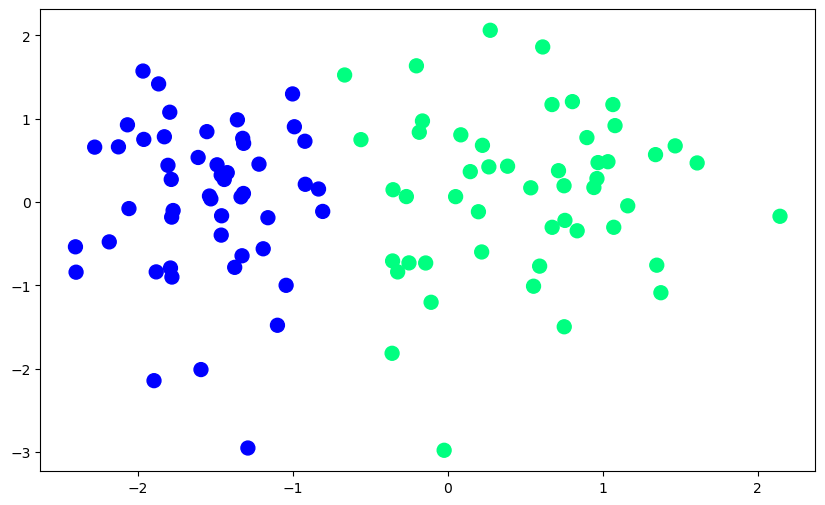

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

In [5]:
def prediction(value):
    if(value>0):
        return 1
    else:
        return 0

In [6]:
def perceptron(X, y):
    # Adding a bias value(1) to each coordinate
    X = np.insert(X, 0, 1, axis=1)  # X-> feature, 0->at what index, 1->value to be added in each row
    weights = np.ones(X.shape[1])  # this is the coefficient of the random line
    lr = 0.1  # learning rate
    
    for i in range(200):  # puttong 200 epoch
        j = np.random.randint(0,100)  # picking a random student from the data
        # putting the coordinate of random student in the random line to get the prediction according to the random line
        y_hat = prediction(np.dot(X[j], weights))
        
        # now upatating the coefficient of the random line so that the studen if not in its proper location it get to its proper location
        weights = weights + lr*(y[j] - y_hat)*X[j]
    
    # returning the final weights of the coefficient ofthe random line, which is goint to be our best fit classification line
    return weights[0], weights[1:]  # here weights[0] is the intercept term and other are coefficient of the features  

In [20]:
intercept_, coef_ = perceptron(X, y)

Printing Coefficient and intercept of the Final Line

In [21]:
print("Coefficient ->", coef_)
print("Intercept ->", intercept_)

Coefficient -> [1.27612847 0.15563257]
Intercept -> 0.9


Calculating The slope and intercept to Convert AX1+BX2+C=0 to y=MX+C

In [22]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

Printing slope and intercept of the equation y=MX+C


In [23]:
print("Slope ->", m)
print("intercept ->",b)

Slope -> -8.199623324914443
intercept -> -5.782851151193325


In [24]:
X_input = np.linspace(-3,3,100)
y_input = m*X_input + b

Printing X_input and y_input

In [25]:
print("X_input ->\n", X_input)
print()
print("y_input ->\n", y_input)

X_input ->
 [-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.9

(-3.0, 2.0)

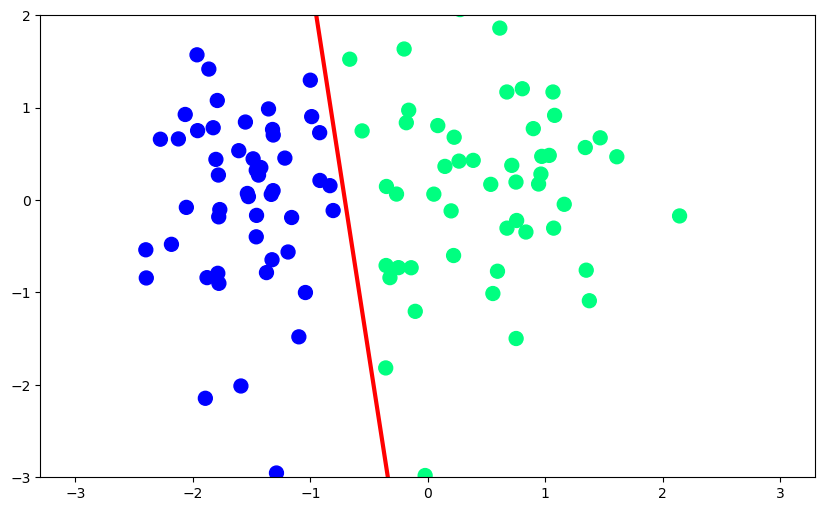

In [27]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color="red",linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)
plt.ylim(-3,2)

In [28]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [29]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [31]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

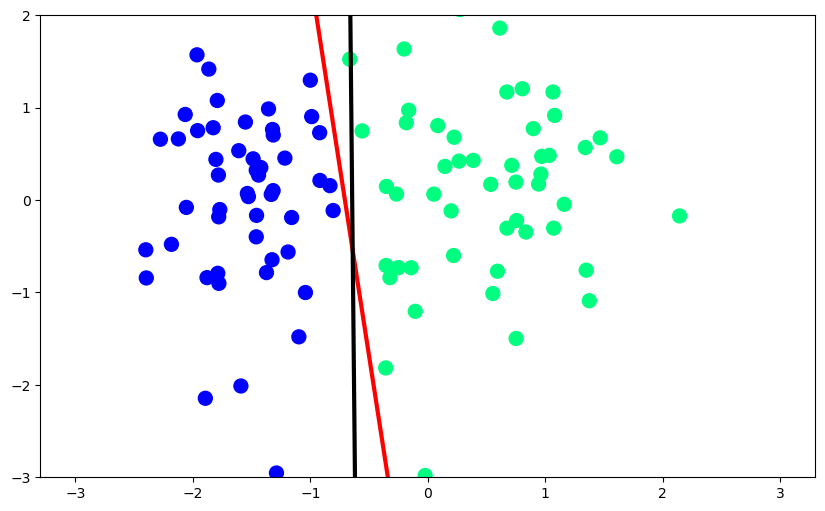

In [33]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
